In [25]:
from scipy import stats; 
import numpy as np; 
import matplotlib.pyplot as plt 
import pymc as pm;
import arviz as az

In [19]:
n = 100

loc_true,scale_true,df_true = 10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution

In [20]:
model = pm.Model()
with model: 
    scale_prior = pm.HalfNormal('scale_prior', sigma=5)
    loc_prior = pm.Normal('loc_prior', mu=0, sigma=10)
    df_prior = pm.DiscreteUniform('df_prior', lower=1, upper=100)

    x_obs = pm.StudentT('likelihood', nu=df_prior, mu=loc_prior, sigma=scale_prior, observed=x)
    

In [23]:
with model:
    idata_MH = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [scale_prior, loc_prior]
>Metropolis: [df_prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


MH Split-Rhats {'loc_prior': 1.0003, 'df_prior': 1.0064, 'scale_prior': 1.0023}


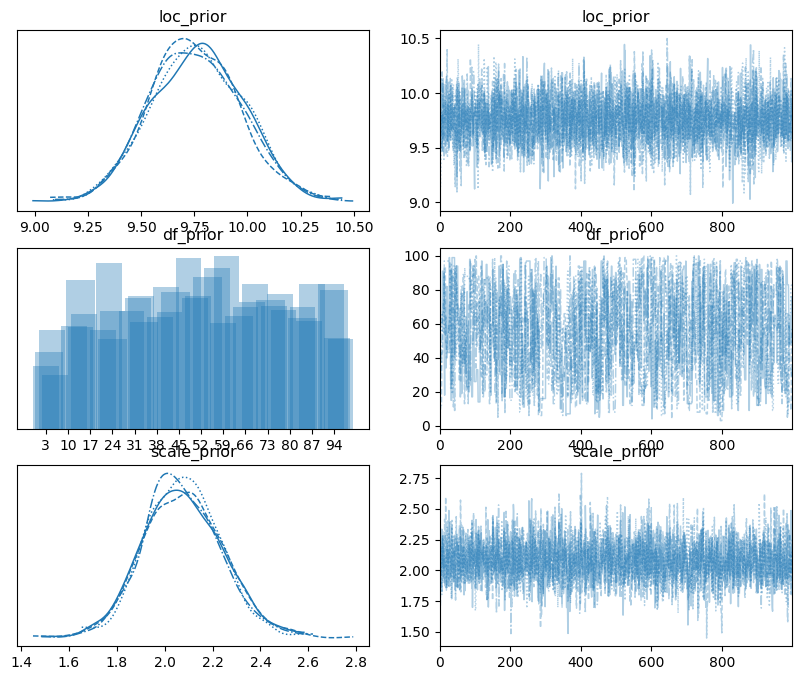

In [32]:
az.plot_trace(idata_MH, figsize=(10, 9));
print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH).items()})

In [34]:
az.summary(idata_MH, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.76,0.22,9.35,10.16,0.0,0.00,3738.87,2973.14,1.00
df_prior,55.51,26.69,12.00,98.00,1.0,0.71,680.55,811.40,1.01
scale_prior,2.08,0.16,1.76,2.37,0.0,0.00,2663.15,2444.90,1.00


c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: 

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

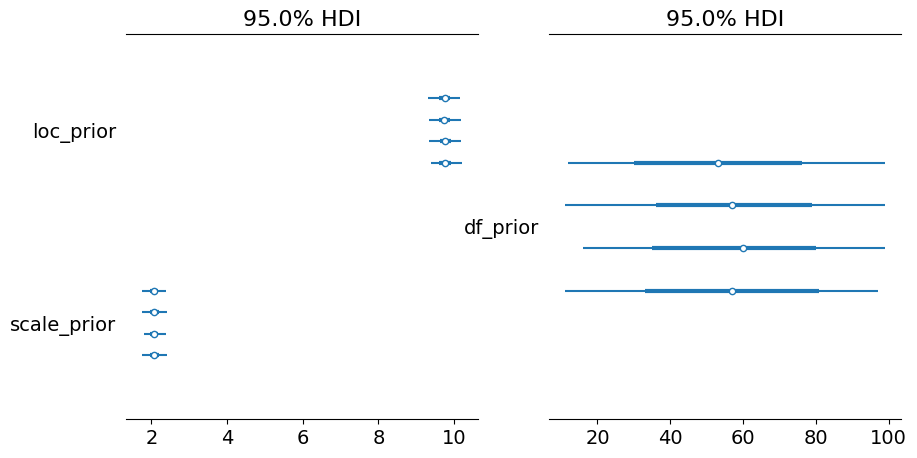

In [45]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
az.plot_forest(idata_MH, var_names=["loc_prior","scale_prior"], combined=False, hdi_prob=0.95,ax=ax[0])
az.plot_forest(idata_MH, var_names=["df_prior"], combined=False, hdi_prob=0.95, ax=ax[1])
